In [1]:
from sklearn import linear_model as lm
import pandas as pd
import torch
pd.set_option('display.max_columns', None)
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn as nn
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib 
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


import tensorflow as tf

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'# 只显示 Error
import warnings
warnings.filterwarnings("ignore")
from random import seed
import numpy as np
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

In [2]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

# 1. 数据及其分布

In [3]:
data = pd.read_csv("data.csv")
shuffled_data = shuffle(data).reset_index(drop=True)
data.head()

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,1,0.395032,0.393743,0.378640,21572414.74,21572414.74,1920840.568,63.867004,1.0,0.089042,0.089042,293.616407,0.077872
1,2,0.382076,0.378545,0.393967,29037202.25,29037202.25,2553017.942,46.184081,1.0,0.087922,0.087922,111.562104,0.099350
2,3,0.361179,0.357530,0.417032,24870699.23,24870699.23,2187843.247,49.910705,1.0,0.087969,0.087969,114.276679,0.108427
3,4,0.377965,0.374717,0.400799,27812575.93,27812575.93,2485072.157,45.546246,1.0,0.089351,0.089351,123.402273,0.153662
4,5,0.386587,0.384328,0.387534,23690912.29,23690912.29,2093395.335,56.853948,1.0,0.088363,0.088363,171.560867,0.117408


In [4]:
testset = shuffled_data.loc[0:1463].reset_index(drop=True)
train_valid = shuffled_data.loc[1464:].reset_index(drop=True)
#1098/1464
testset

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,917,0.369312,0.365655,0.404786,28687135.06,28687135.06,2521067.592,45.735560,1.00000,0.087881,0.087881,110.698328,0.114787
1,1854,0.403201,0.400474,0.369325,26454918.38,26454918.38,2335257.093,52.846709,1.00000,0.088273,0.088273,135.435427,0.025665
2,269,0.398718,0.396929,0.375348,22918715.45,22918715.45,2021366.592,60.235349,1.00000,0.088197,0.088197,209.779953,0.160966
3,1041,0.408630,0.406447,0.366322,25393382.95,25393382.95,2265217.988,55.014398,1.00000,0.089205,0.089205,167.763072,0.016603
4,3218,0.393426,0.390079,0.382392,27408421.77,27408421.77,2406022.213,49.715543,1.00000,0.087784,0.087784,114.244769,0.009028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,4567,0.398720,0.397363,0.376507,21861272.28,21861272.28,1933596.933,62.731354,1.00000,0.088449,0.088449,277.539652,0.221311
1460,175,0.388570,0.385970,0.390900,26537285.57,26536515.33,2336827.810,53.185140,0.99997,0.088060,0.088060,150.205770,-0.057690
1461,3202,0.386539,0.383306,0.389239,27668209.62,27668209.62,2398214.436,48.981912,1.00000,0.086678,0.086678,120.388553,0.051909
1462,1709,0.385590,0.382970,0.392010,26537389.83,26539753.38,2342717.650,52.039110,1.00009,0.088280,0.088270,149.905770,0.014170


### 1.1:  v+, v-, vv

<AxesSubplot: xlabel='v+ ', ylabel='Density'>

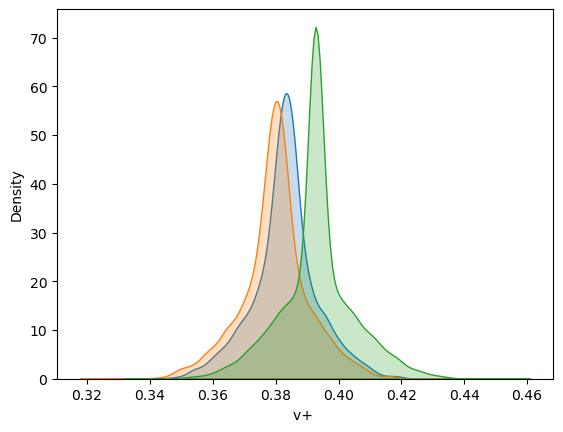

In [4]:
sns.kdeplot(data.iloc[:,1], shade=True)
sns.kdeplot(data.iloc[:,2], shade=True)
sns.kdeplot(data.iloc[:,3], shade=True)

### 1.2: R1, R2, 完全重合

<AxesSubplot: xlabel='R1 ', ylabel='Density'>

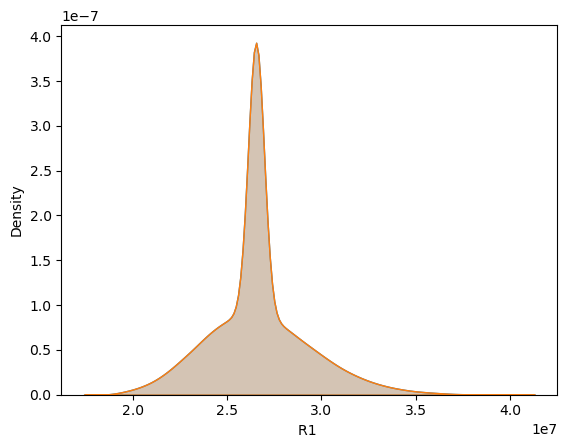

In [5]:
sns.kdeplot(data.iloc[:,4], shade=True)
sns.kdeplot(data.iloc[:,5], shade=True)

### 1.3: R3

<AxesSubplot: xlabel='R3 ', ylabel='Density'>

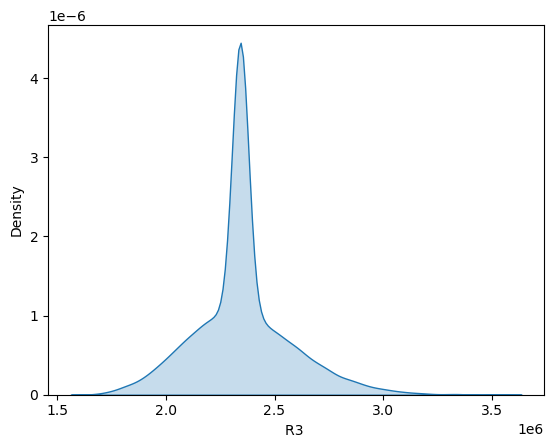

In [6]:
sns.kdeplot(data.iloc[:,6], shade=True)

### 1.4：I3(nA)

<AxesSubplot: xlabel='I3(nA)', ylabel='Density'>

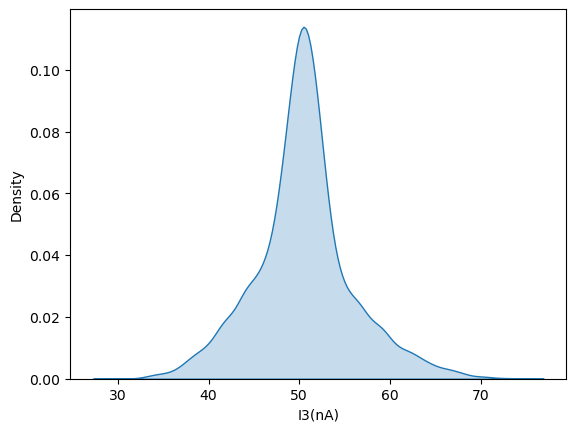

In [7]:
sns.kdeplot(data.iloc[:,7], shade=True)

### 1.5: 我们应该调整该数据嘛？（R2/R1)

<AxesSubplot: xlabel='R2/R1', ylabel='Density'>

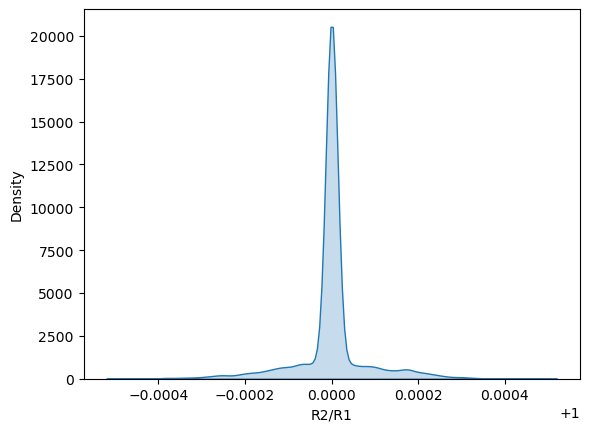

In [8]:
sns.kdeplot(data.iloc[:,8], shade=True)

### 1.6 这是R3/R1 和 R2/R1, 完全重合

<AxesSubplot: xlabel='R3/R1', ylabel='Density'>

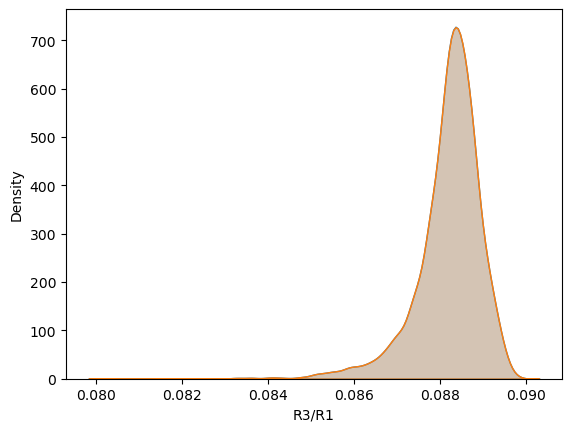

In [9]:
sns.kdeplot(data.iloc[:,9], shade=True)
sns.kdeplot(data.iloc[:,10], shade=True)

### 1.7: 该数据有部分远超2个标准差，是否会对训练造成严重影响

<AxesSubplot: xlabel='vv/[(v+)-(v-)]', ylabel='Density'>

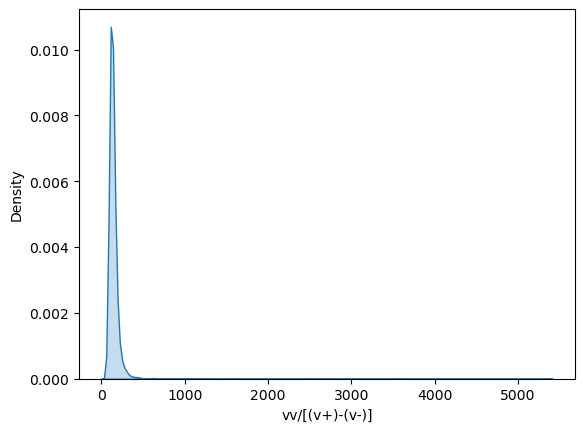

In [10]:
sns.kdeplot(data.iloc[:,11], shade=True)

### 1.8: Polarity

<AxesSubplot: xlabel='polarity', ylabel='Density'>

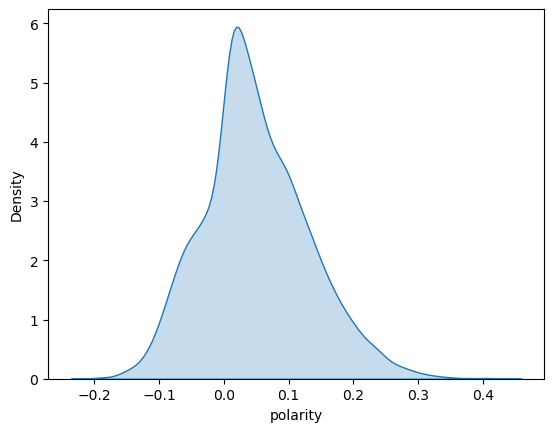

In [11]:
sns.kdeplot(data.iloc[:,12], shade=True)

# 2. Train + Validate, 获得 RMSE

## 各个模型的 RMSE

### 1. Linear Regression

In [18]:
linear()

0.06863429305936367

### 2. Ridge Regression

In [19]:
ridge()

0.07195452357042427

### 3. Support Vector Regression

In [20]:
svr()

poly 0.01
0.07713349068391938
poly 0.1
0.07643457714254151
rbf 0.01
0.05718791673612054


0.05718791673612054

### 4. Decision Tree

In [21]:
decision_tree()

['squared_error', 'best', None]


0.0406326077778151

### 5. Polynomial Regression

In [22]:
poly()

[4, True, True]


0.047698367796046325

### MLP

In [17]:
mlp()

Epoch 1/2
162/162 [==============================] - 1s 2ms/step - loss: 0.0983 - val_loss: 0.0066
Epoch 2/2
46/46 [==============================] - 0s 906us/step
Epoch 1/2
162/162 [==============================] - 1s 2ms/step - loss: 0.0070 - val_loss: 0.0079
Epoch 2/2
46/46 [==============================] - 0s 887us/step
Epoch 1/2
162/162 [==============================] - 1s 2ms/step - loss: 0.0222 - val_loss: 0.0066
Epoch 2/2
46/46 [==============================] - 0s 931us/step
Epoch 1/2
162/162 [==============================] - 1s 2ms/step - loss: 0.3528 - val_loss: 0.0066
Epoch 2/2
46/46 [==============================] - 0s 864us/step
Epoch 1/2
162/162 [==============================] - 1s 2ms/step - loss: 0.0418 - val_loss: 0.0068
Epoch 2/2
46/46 [==============================] - 0s 908us/step


0.08262759113442039

# 3. 各模型的 implementation

In [12]:
# 线性回归
def linear():
    total_error = 0
    kf = KFold(n_splits=5)
    
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()
        
        
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        predicted = lr.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [13]:
def ridge():
    kf = KFold(n_splits=5)

    total = 0

    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()

        ridge = Ridge()
        ridge.fit(x_train, y_train)
        total = total + rmse(ridge.predict(x_v), y_v)
        
    return total/5

In [14]:
# SVR
def svr():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    # 'linear', 'sigmoid' too slow
    # 'precomputed' must be a square matrix
    for kr in ['poly', 'rbf']:
        for eps in [0.01,0.1, 1, 10]:
            total = 0
            for train, test in kf.split(shuffled_data):
                train_data = shuffled_data.loc[train]
                validate_data = shuffled_data.loc[test]
                y_train = train_data['polarity']
                x_train = train_data.iloc[:, 1:12]
                y_v = validate_data['polarity']
                x_v = validate_data.iloc[:, 1:12]
                y_v_numpy = y_v.to_numpy()


                svr = SVR (kernel = kr, epsilon = eps)
                svr.fit(x_train, y_train)
                svr_predicted = svr.predict(x_v)
                total += rmse(svr_predicted, y_v)
                pass
            if total/5 < least_rmse:
                print (kr, eps)
                print (total/5)
                least_rmse = total/5
                pass
    return least_rmse

In [15]:
# 决策树
def decision_tree():    
    kf = KFold(n_splits=5)
    # grid search
    least_rmse = 1000000000
    
    for cri in ['squared_error', 'friedman_mse', 'absolute_error']:
        for sp in ['best', 'random']:
            for max_feat in ['auto', 'sqrt', 'log2', None]:
                
                total = 0
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
                    decision = DecisionTreeRegressor(criterion = cri, splitter=sp, max_features = max_feat)
                    decision.fit(x_train, y_train)
                    result = decision.predict(x_v)
                    total = total + rmse(result, y_v)
                    pass
                
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [cri, sp, max_feat]
       

    print (best_combination)
    return least_rmse

In [47]:
def poly ():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for d in [2,3,4]:
        for interaction in [True, False]:
            for bias in [True, False]:
                total = 0
                
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
    
                    lr = LinearRegression()
                    quadratic = PolynomialFeatures(degree=d, interaction_only=interaction, include_bias=bias)
                    X_train_quad = quadratic.fit_transform(x_train)
                    lr.fit(X_train_quad, y_train)
                    total = total + rmse(y_v, lr.predict(quadratic.fit_transform(x_v)))
                    pass
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [d, interaction, bias]
                    pass
                    
    print (best_combination)    
    return least_rmse

In [15]:
def MLP(x_train,y_train,x_v):
    
    size, features = x_train.shape
    
    inputs = tf.keras.Input(shape=(features, ))
    hidden = tf.keras.layers.Dense(64, activation='tanh')(inputs)
    #hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
    outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

    tf_model = tf.keras.Model(inputs, outputs)
    tf_model.compile(
        optimizer = 'adam',
        loss = 'mse'
    )

    history = tf_model.fit(
        x_train,
        y_train,
        validation_split=0.12,
        batch_size=32,
        epochs=2
    )
    result = tf_model.predict(x_v)
    return result

In [16]:
def mlp():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    #for d in [2,3,4]:
    #    for interaction in [True, False]:
    #        for bias in [True, False]:
    total = 0
                
                # cross validation
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()


       
        total = total + rmse(y_v, MLP(x_train,y_train,x_v)[:,0])
        pass

    if total/5 < least_rmse:
        least_rmse = total/5
        #best_combination = [d, interaction, bias]
        pass
                    
    #print (MLP(x_train,y_train,x_v)[:,0])    
    return least_rmse

In [15]:
from sklearn.neural_network import MLPRegressor
def newmlp():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for hidden in [(20),(25),(30),(10,10),(20,20)]:#(10),(15),(20),(25),(30),多层效果不佳
        for act in ['logistic','tanh']:#'identity','relu'不好
            for sol in ['lbfgs','adam']:#,'adam'
                for alp in [0.0001,0.001,0.01]:#0.0001,0.001,0.01,0.1
                    #for lr in ['constant','invscaling','adaptive']:
                        for mi in [1,10,100]:#1,10,100,200
                                total = 0
                                # cross validation
                                for train, test in kf.split(train_valid):
                                    train_data = train_valid.loc[train]
                                    validate_data = train_valid.loc[test]
                                    y_train = train_data['polarity']
                                    x_train = train_data.iloc[:, 1:12]
                                    y_v = validate_data['polarity']
                                    x_v = validate_data.iloc[:, 1:12]
                                    y_v_numpy = y_v.to_numpy()

                                    mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                    activation=act, 
                                    solver=sol, 
                                    alpha=alp,   ## L2惩罚参数
                                    max_iter=mi, 
                                    #learning_rate = lr,
                                    random_state=123,
                                    early_stopping=True, ## 是否提前停止训练
                                    #validation_fraction=0.2, ## 20%作为验证集
                                    #                    tol=1e-8,
                                    )
                                    ## 拟合训练数据集
                                    mlpr.fit(x_train,y_train)
                                    result = mlpr.predict(x_v)
                                    total = total + rmse(result, y_v)
                                    pass

                                print([hidden, act, sol,alp,mi])
                                print(total/5)
                                if total/5 < least_rmse:
                                    least_rmse = total/5
                                    best_combination = [hidden, act, sol,alp,mi]
                                    


    print (best_combination)
    mlpr = MLPRegressor(hidden_layer_sizes=best_combination[0], ## 隐藏层的神经元个数
                    activation=best_combination[1], 
                    solver=best_combination[2], 
                    alpha=best_combination[3],   ## L2惩罚参数
                    max_iter=best_combination[4], 
                    #learning_rate = best_combination[4],
                    random_state=123,
                    verbose = True,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
    x_test = testset.iloc[:, 1:12]
    y_test = testset['polarity']
    x_train_valid = train_valid.iloc[:, 1:12]
    y_train_valid = train_valid['polarity']
    mlpr.fit(x_train_valid,y_train_valid)
    result = mlpr.predict(x_train_valid)
    print("train prediction result rmse: %f" %rmse(result,y_train_valid))
    result = mlpr.predict(x_test)
    print("test prediction result rmse: %f" %rmse(result,y_test))
    
    return least_rmse


## 定义含有4个隐藏层的MLP网络
#mlpr = MLPRegressor(hidden_layer_sizes=(64,64), ## 隐藏层的神经元个数
#                    activation='tanh', 
#                    solver='adam', 
#                    alpha=0.0001,   ## L2惩罚参数
#                    max_iter=20, 
#                    random_state=123,
#                    early_stopping=True, ## 是否提前停止训练
#                    validation_fraction=0.2, ## 20%作为验证集
#                    tol=1e-8,
#                   )

## 拟合训练数据集
#mlpr.fit(x_train,y_train)
#result = mlpr.predict(x_v)
#print(rmse(result, y_v))
#result2 = mlpr.predict(x_train)
#print(rmse(result2, y_train))
## 可视化损失函数
#plt.figure()
#plt.plot(mlpr.loss_curve_)
#plt.xlabel("iters")
#plt.ylabel(mlpr.loss)
#plt.show()


In [16]:
newmlp()

[20, 'logistic', 'lbfgs', 0.0001, 1]
0.08191741384281089
[20, 'logistic', 'lbfgs', 0.0001, 10]
0.08191741384281089
[20, 'logistic', 'lbfgs', 0.0001, 100]
0.08191741384281089
[20, 'logistic', 'lbfgs', 0.001, 1]
0.08191741384257192
[20, 'logistic', 'lbfgs', 0.001, 10]
0.08191741384257192
[20, 'logistic', 'lbfgs', 0.001, 100]
0.08191741384257192
[20, 'logistic', 'lbfgs', 0.01, 1]
0.0819174138401829
[20, 'logistic', 'lbfgs', 0.01, 10]
0.0819174138401829
[20, 'logistic', 'lbfgs', 0.01, 100]
0.0819174138401829
[20, 'logistic', 'adam', 0.0001, 1]
0.10081230851225047
[20, 'logistic', 'adam', 0.0001, 10]
0.08196599466232421
[20, 'logistic', 'adam', 0.0001, 100]
0.08196599466232421
[20, 'logistic', 'adam', 0.001, 1]
0.10081230384122009
[20, 'logistic', 'adam', 0.001, 10]
0.08195856382468587
[20, 'logistic', 'adam', 0.001, 100]
0.08195407345628596
[20, 'logistic', 'adam', 0.01, 1]
0.10081225722326519
[20, 'logistic', 'adam', 0.01, 10]
0.08196302969559535
[20, 'logistic', 'adam', 0.01, 100]
0.0819

[(20, 20), 'logistic', 'lbfgs', 0.001, 1]
0.08191747675319762
[(20, 20), 'logistic', 'lbfgs', 0.001, 10]
0.08191747675319762
[(20, 20), 'logistic', 'lbfgs', 0.001, 100]
0.08191747675319762
[(20, 20), 'logistic', 'lbfgs', 0.01, 1]
0.08191747681379835
[(20, 20), 'logistic', 'lbfgs', 0.01, 10]
0.08191747681379835
[(20, 20), 'logistic', 'lbfgs', 0.01, 100]
0.08191747681379835
[(20, 20), 'logistic', 'adam', 0.0001, 1]
0.08225203073980368
[(20, 20), 'logistic', 'adam', 0.0001, 10]
0.0820030240689931
[(20, 20), 'logistic', 'adam', 0.0001, 100]
0.0819459658901234
[(20, 20), 'logistic', 'adam', 0.001, 1]
0.08225198590117876
[(20, 20), 'logistic', 'adam', 0.001, 10]
0.08192913304819101
[(20, 20), 'logistic', 'adam', 0.001, 100]
0.08193644764447705
[(20, 20), 'logistic', 'adam', 0.01, 1]
0.0822515189352819
[(20, 20), 'logistic', 'adam', 0.01, 10]
0.08198962078727752
[(20, 20), 'logistic', 'adam', 0.01, 100]
0.08194389467722739
[(20, 20), 'tanh', 'lbfgs', 0.0001, 1]
0.08212252522662473
[(20, 20), 

0.08187658593693464

In [9]:
from sklearn.neural_network import MLPRegressor
def mlp_sgd():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for hidden in [(25)]:#(10),(15),(20),(25),(30),(25,25),(25,25,25)
        for act in ['logistic','tanh']:#'identity','relu'
            for sol in ['sgd']:#,'adam'
                for alp in [0.0001]:
                    for lr in ['constant','invscaling','adaptive']:
                        for powt in [0.5]:
                            for mi in [1000]:#1,10,100,200,200,500
                                for mom in [0.95]:#0.85,0.9,
                                    total = 0
                                    # cross validation
                                    for train, test in kf.split(train_valid):
                                        train_data = train_valid.loc[train]
                                        validate_data = train_valid.loc[test]
                                        y_train = train_data['polarity']
                                        x_train = train_data.iloc[:, 1:12]
                                        y_v = validate_data['polarity']
                                        x_v = validate_data.iloc[:, 1:12]
                                        y_v_numpy = y_v.to_numpy()

                                        mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                        activation=act, 
                                        solver=sol, 
                                        alpha=alp,   ## L2惩罚参数
                                        learning_rate = lr,
                                        power_t = powt,
                                        max_iter=mi, 
                                        momentum = mom,
                                        random_state=123,
                                        early_stopping=True, ## 是否提前停止训练
                                        #validation_fraction=0.2, ## 20%作为验证集
                                        #                    tol=1e-8,
                                        )
                                        ## 拟合训练数据集
                                        mlpr.fit(x_train,y_train)
                                        result = mlpr.predict(x_v)
                                        total = total + rmse(result, y_v)
                                        pass


                                    if total/5 < least_rmse:
                                        least_rmse = total/5
                                        best_combination = [hidden, act, sol,alp,lr,powt,mi,mom]


    print (best_combination)
    mlpr = MLPRegressor(hidden_layer_sizes=best_combination[0], ## 隐藏层的神经元个数
                    activation=best_combination[1], 
                    solver=best_combination[2], 
                    alpha=best_combination[3],   ## L2惩罚参数
                    learning_rate = best_combination[4],
                    power_t = best_combination[5],
                    max_iter=best_combination[6], 
                    momentum = best_combination[7],
                    random_state=123,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
    x_test = testset.iloc[:, 1:12]
    y_test = testset['polarity']
    x_train_valid = train_valid.iloc[:, 1:12]
    y_train_valid = train_valid['polarity']
    mlpr.fit(x_train_valid,y_train_valid)
    result = mlpr.predict(x_test)
    print("test prediction result rmse: %f" %rmse(result,y_test))
    
    return least_rmse

In [10]:
mlp_sgd()

[25, 'tanh', 'sgd', 0.0001, 'adaptive', 0.5, 1000, 0.95]
test prediction result rmse: 0.081327


0.08192903515676705

# 1.31

In [5]:
testset

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,917,0.369312,0.365655,0.404786,28687135.06,28687135.06,2521067.592,45.735560,1.00000,0.087881,0.087881,110.698328,0.114787
1,1854,0.403201,0.400474,0.369325,26454918.38,26454918.38,2335257.093,52.846709,1.00000,0.088273,0.088273,135.435427,0.025665
2,269,0.398718,0.396929,0.375348,22918715.45,22918715.45,2021366.592,60.235349,1.00000,0.088197,0.088197,209.779953,0.160966
3,1041,0.408630,0.406447,0.366322,25393382.95,25393382.95,2265217.988,55.014398,1.00000,0.089205,0.089205,167.763072,0.016603
4,3218,0.393426,0.390079,0.382392,27408421.77,27408421.77,2406022.213,49.715543,1.00000,0.087784,0.087784,114.244769,0.009028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,4567,0.398720,0.397363,0.376507,21861272.28,21861272.28,1933596.933,62.731354,1.00000,0.088449,0.088449,277.539652,0.221311
1460,175,0.388570,0.385970,0.390900,26537285.57,26536515.33,2336827.810,53.185140,0.99997,0.088060,0.088060,150.205770,-0.057690
1461,3202,0.386539,0.383306,0.389239,27668209.62,27668209.62,2398214.436,48.981912,1.00000,0.086678,0.086678,120.388553,0.051909
1462,1709,0.385590,0.382970,0.392010,26537389.83,26539753.38,2342717.650,52.039110,1.00009,0.088280,0.088270,149.905770,0.014170


In [6]:
train_valid

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,2471,0.387640,0.384840,0.390420,26537220.78,26531881.52,2341544.383,54.047990,0.99980,0.088240,0.088250,139.250270,0.008790
1,1532,0.384600,0.381330,0.392510,26537395.68,26536790.75,2347582.834,50.986940,0.99998,0.088460,0.088470,120.047010,-0.049030
2,12,0.380670,0.378450,0.394570,26543767.99,26535331.13,2333651.385,48.314230,0.99968,0.087920,0.087950,177.454990,-0.047950
3,1874,0.353421,0.350127,0.428294,26395883.45,26395883.45,2352004.840,45.539399,1.00000,0.089105,0.089105,129.994382,0.171742
4,498,0.382370,0.378690,0.394040,26541605.41,26535355.59,2352018.383,50.114760,0.99976,0.088620,0.088640,106.813120,-0.081650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,949,0.387440,0.384010,0.390990,26536272.23,26533276.47,2340260.701,52.787280,0.99989,0.088190,0.088200,113.926250,-0.036330
5852,2427,0.393795,0.390779,0.381728,26878092.75,26878092.75,2372627.320,50.936803,1.00000,0.088274,0.088274,126.571097,0.006423
5853,630,0.379264,0.374747,0.393920,32688244.70,32688244.70,2715786.069,40.495614,1.00000,0.083081,0.083081,87.201291,0.170833
5854,849,0.389740,0.387480,0.390410,26539882.34,26540771.79,2335625.734,52.429700,1.00003,0.088000,0.088000,172.945840,0.082700


In [7]:
X = train_valid.values[:,1:-1]
Y = train_valid.values[:,-1]
X_test = testset.values[:,1:-1]
Y_test = testset.values[:,-1]
print(X.shape)
print(Y.shape)

(5856, 11)
(5856,)


In [8]:
def cv_performance(clf, X, y, k=5):
    """Split data into k folds and run cross-validation.

    Splits the data X and the labels y into k-folds and runs k-fold
    cross-validation: for each fold i in 1...k, trains a classifier on
    all the data except the ith fold, and tests on the ith fold.
    Calculates and returns the k-fold cross-validation performance metric for
    classifier clf by averaging the performance across folds.
    Input:
        clf: an instance of SVC()
        X: (n,d) array of feature vectors, where n is the number of examples
           and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: an int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='accuracy'
             other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
             and 'specificity')
    Returns:
        average 'test' performance across the k folds as np.float64
    """
    # TODO: Implement this function
    # HINT: You may find the StratifiedKFold from sklearn.model_selection
    # to be useful
    
    # Put the performance of the model on each fold in the scores array
    scores = []
    skf = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        clf.fit(X[train_index,:],y[train_index])
        y_pred = clf.predict(X[test_index,:])
        perf = rmse(y_pred, y[test_index])
        scores.append(perf)

    return np.array(scores).mean()


In [9]:
#normalization
#(data - mean) / (std)
def normalize(X):
    mean = np.mean(X,axis = 0)
    std = np.std(X,axis = 0)
    normalized_data = (X - mean) / std
    return normalized_data
    

In [10]:
X_normalize = normalize(X)
X_test_normalize = normalize(X_test)

In [11]:
#cross validation
from sklearn.neural_network import MLPRegressor
def newmlp():
    least_rmse = 1000000000
    for hidden in [(10),(15),(20),(25),(30),(10,10),(20,20),(30,30),(10,10,10),(20,20,20),(30,30,30),(20,1)]:#(10),(15),(20),(25),(30),多层效果不佳
        for act in ['logistic','tanh']:#'identity','relu'不好
            for sol in ['lbfgs','adam']:#,'adam'
                for alp in [0.00001,0.0001,0.001,0.01,0.1,1]:#0.0001,0.001,0.01,0.1
                    #for lr in ['constant','invscaling','adaptive']:
                        for mi in [1000]:#1,10,100,200
                                # cross validation
                                mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                activation=act, 
                                solver=sol, 
                                alpha=alp,   ## L2惩罚参数
                                max_iter=mi, 
                                #learning_rate = lr,
                                random_state=123,
                                early_stopping=True, ## 是否提前停止训练
                                )
                                    ## 拟合训练数据集
                                perf = cv_performance(mlpr,X_normalize,Y)
                                #print([hidden, act, sol,alp,mi])
                                #print(perf)
                                if perf < least_rmse:
                                    least_rmse = perf
                                    best_combination = [hidden, act, sol,alp,mi]
                            
    return (best_combination,least_rmse)
   

In [37]:
best_paras, best_cv_perf = newmlp()
print(best_paras)
print(best_cv_perf)

[(30, 30, 30), 'tanh', 'lbfgs', 0.1, 1000]
0.029218594536073138


In [39]:
 #mlp model training
mlpr = MLPRegressor(hidden_layer_sizes=best_paras[0], ## 隐藏层的神经元个数
                    activation=best_paras[1], 
                    solver=best_paras[2], 
                    alpha=best_paras[3],   ## L2惩罚参数
                    max_iter=best_paras[4], 
                    #learning_rate = best_combination[4],
                    random_state=123,
                    #verbose = True,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
x_test = X_test_normalize
y_test = Y_test
x_train_valid = X_normalize
y_train_valid = Y
mlpr.fit(X_normalize,Y)
result = mlpr.predict(X_normalize)
print("train prediction result rmse: %f" %rmse(result,Y))
result = mlpr.predict(X_test_normalize)
print("test prediction result rmse: %f" %rmse(result,Y_test))


train prediction result rmse: 0.028132
test prediction result rmse: 0.029649


In [12]:
from sklearn.neural_network import MLPRegressor
def mlp_sgd():
    least_rmse = 1000000000
    for hidden in [(10),(20),(30),(10,10),(20,20),(30,30),(10,10,10),(20,20,20),(30,30,30),(20,1)]:#(10),(15),(20),(25),(30),(10,10),(20,20),(30,30),(10,10,10),(20,20,20),
        for act in ['logistic','tanh']:#'identity','relu'
            for sol in ['sgd']:#,
                for alp in [0.0001]:#0.00001,0.0001,0.001,0.01,0.1,1
                    for lr in ['constant']:#,'invscaling','adaptive'
                        for powt in [0.5]:
                            for mi in [1000]:#1,10,100,200,200,500
                                for mom in [0.95]:#0.85,0.9,
                                    # cross validation
                                    mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                    activation=act, 
                                    solver=sol, 
                                    alpha=alp,   ## L2惩罚参数
                                    max_iter=mi, 
                                    learning_rate = lr,
                                    power_t = powt,
                                    momentum = mom,
                                    random_state=123,
                                    early_stopping=True, ## 是否提前停止训练
                                    )
                                    perf = cv_performance(mlpr,X_normalize,Y)
                                    print([hidden, act, sol,alp,mi])
                                    print(perf)
                                    if perf < least_rmse:
                                        least_rmse = perf
                                        best_combination = [hidden, act, sol,alp,lr,powt,mi,mom]
    
    return (best_combination,least_rmse)

In [13]:
best_paras_sgd, best_cv_perf_sgd = mlp_sgd()
print(best_paras_sgd)
print(best_cv_perf_sgd)

[10, 'logistic', 'sgd', 0.0001, 1000]
0.06298034833412221
[10, 'tanh', 'sgd', 0.0001, 1000]
0.04751547697194911
[20, 'logistic', 'sgd', 0.0001, 1000]
0.06395416904185307
[20, 'tanh', 'sgd', 0.0001, 1000]
0.04373138927749398
[30, 'logistic', 'sgd', 0.0001, 1000]
0.06660615754163546
[30, 'tanh', 'sgd', 0.0001, 1000]
0.043374263263341505
[(10, 10), 'logistic', 'sgd', 0.0001, 1000]
0.07725834827654661
[(10, 10), 'tanh', 'sgd', 0.0001, 1000]
0.04403084629533104
[(20, 20), 'logistic', 'sgd', 0.0001, 1000]
0.07861069431288327
[(20, 20), 'tanh', 'sgd', 0.0001, 1000]
0.04396838426540224
[(30, 30), 'logistic', 'sgd', 0.0001, 1000]
0.07729796939926763
[(30, 30), 'tanh', 'sgd', 0.0001, 1000]
0.04340521917173218
[(10, 10, 10), 'logistic', 'sgd', 0.0001, 1000]
0.08184325513107846
[(10, 10, 10), 'tanh', 'sgd', 0.0001, 1000]
0.04648604963978743
[(20, 20, 20), 'logistic', 'sgd', 0.0001, 1000]
0.0825183133312113
[(20, 20, 20), 'tanh', 'sgd', 0.0001, 1000]
0.04196646417061556
[(30, 30, 30), 'logistic', '

In [14]:
mlpr = MLPRegressor(hidden_layer_sizes=best_paras_sgd[0], ## 隐藏层的神经元个数
                    activation=best_paras_sgd[1], 
                    solver=best_paras_sgd[2], 
                    alpha=best_paras_sgd[3],   ## L2惩罚参数
                    learning_rate = best_paras_sgd[4],
                    power_t = best_paras_sgd[5],
                    max_iter=best_paras_sgd[6], 
                    momentum = best_paras_sgd[7],
                    random_state=123,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
x_test = X_test_normalize
y_test = Y_test
x_train_valid = X_normalize
y_train_valid = Y
mlpr.fit(X_normalize,Y)
result = mlpr.predict(X_normalize)
print("train prediction result rmse: %f" %rmse(result,y_train_valid))
result = mlpr.predict(X_test_normalize)
print("test prediction result rmse: %f" %rmse(result,y_test))

train prediction result rmse: 0.038862
test prediction result rmse: 0.047534


# Results


In [ ]:
#train prediction result rmse: 0.032403 
#test prediction result rmse: 0.033287
#parameter
#[(20, 20), 'tanh', 'adam', 0.0001, 100]
#0.03520247951400813

# train prediction result rmse: 0.028132
# test prediction result rmse: 0.029649
# [(30, 30, 30), 'tanh', 'lbfgs', 0.1, 1000]
# 0.029218594536073138

#sgd
# train prediction result rmse: 0.038862
# test prediction result rmse: 0.047534
# [(30, 30, 30), 'tanh', 'sgd', 0.0001, 'constant', 0.5, 1000, 0.95]
# 0.041394803016820796